# 데이터 출처 - 공공데이터포털

- 한국전력공사_서울시 전기차 충전소 충전량
- https://www.data.go.kr/data/15100212/fileData.do
- 2021.1.1-2022.3.31 기간의 서울시에 위치하고 있는 한국전력공사의 전기차 충전소의 충전량을 제공합니다.
- 데이터 사이즈가 큰 관계로 21년도 데이터만 사용합니다.<br>참고 : https://colab.research.google.com/drive/1EkpAURXDs5mpLRpIVtlImUayJBgiOPiX#scrollTo=KZYY5LGUIQ1Q&uniqifier=1

###분석 목표

- 서울시 자치구별 전기차 충전소 충전량 분석
-

### 기본설정

In [ ]:
# 구글마운트
from google.colab import drive
drive.mount('/content/drive')

# 한글폰트
sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [45]:
# 주피터에서 실행하는 한글패치
# 단점 매번 실행 시켜야됨...

import matplotlib.pyplot as plt
# %matplotlib inline

from matplotlib import font_manager, rc

f_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

### 데이터 불러오기 및 데이터 확인

In [25]:
# 패키지 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# file_path = '/content/drive/MyDrive/새싹교육/미니프로젝트/서울시 전기차 충전소 충전량/21년도_서울시_전기차_충전소.csv'

# 주피터에서 실행할시
file_path = './21년도_서울시_전기차_충전소.csv'
df = pd.read_csv(file_path)

In [27]:
df.head(2)

,Unnamed: 0,충전구분,충전소명,주소,충전기용량,충전량,충전시간,충전분,충전시작시각,충전종료시각,시작_연도,시작_월,시작_일,시작_시,시작_분,종료_연도,종료_월,종료_일,종료_시,종료_분
0,0,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,0.05,0,0,2021-01-01 02:06:20,2021-01-01 02:06:36,2021,1,1,2,6,2021,1,1,2,6
1,1,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,13.10,0,29,2021-01-02 14:58:37,2021-01-02 15:28:25,2021,1,2,14,58,2021,1,2,15,28


In [71]:
df['주소'].unique()

array(['서울특별시 영등포구 경인로 878', '경기도 하남시 감북로 80', '서울특별시 강동구 구천면로 395(명일동)',
       '서울특별시 송파구 마천동 성내천로37길 37', '서울특별시 송파구 신천동 29-5 송파구청 앞',
       '서울특별시 송파구 송파동 오금로32길 14', '서울특별시 송파구 가락동 154',
       '서울특별시 강동구 둔촌동 522-9', '서울특별시 강동구 강일동 아리수로93길 40',
       '서울특별시 송파구 양재대로 932', '서울특별시 강동구 둔촌동 명일로 102', '서울특별시 송파구 잠실동 40',
       '서울특별시 송파구 장지동 516', '서울특별시 강동구 구천면로 42길 60(천호동)',
       '서울특별시 송파구 잠실동 잠실로 88', '서울특별시 송파구 올림픽로 135',
       '서울특별시 강동구 성내동 풍성로 128', '서울특별시 강동구 천호동 천호대로 1089',
       '서울특별시 송파구 거여동 양산로4길 8', '서울특별시 송파구 거여동 195-1',
       '서울특별시 송파구 위례광장로 163 (장지동, 위례22단지)', '서울특별시 송파구 신천동 7-11',
       '서울특별시 강동구 명일동 260-1', '서울특별시 강동구 고덕동 동남로79길 26',
       '서울특별시 송파구 가락동 동남로 193', '서울특별시 송파구 충민로6길 14',
       '서울특별시 송파구 송파대로 8길 17', '서울특별시 송파구 풍납동 403-11',
       '서울특별시 송파구 신천동 올림픽로 269', '서울특별시 송파구 거여동 양산로4길 16',
       '서울특별시 강동구 상일로 74', '서울특별시 강동구 양재대로 1571',
       '서울특별시 송파구 가락동 송파대로28길 27', '서울특별시 송파구 장지동 위례광장로 215',
       '서울특별시 송파구 충민로 4길 19', '서울특별시 송파구 올림픽로35

In [28]:
# col, row 개수 확인
df.shape

(487703, 20)

In [29]:
# 데이터 정보확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487703 entries, 0 to 487702
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  487703 non-null  int64  
 1   충전구분        487703 non-null  object 
 2   충전소명        487703 non-null  object 
 3   주소          487703 non-null  object 
 4   충전기용량       487703 non-null  int64  
 5   충전량         487703 non-null  float64
 6   충전시간        487703 non-null  int64  
 7   충전분         487703 non-null  int64  
 8   충전시작시각      487703 non-null  object 
 9   충전종료시각      487703 non-null  object 
 10  시작_연도       487703 non-null  int64  
 11  시작_월        487703 non-null  int64  
 12  시작_일        487703 non-null  int64  
 13  시작_시        487703 non-null  int64  
 14  시작_분        487703 non-null  int64  
 15  종료_연도       487703 non-null  int64  
 16  종료_월        487703 non-null  int64  
 17  종료_일        487703 non-null  int64  
 18  종료_시        487703 non-null  int64  
 19  종료

In [30]:
# Nan값 존재 X
df.isnull().sum()

Unnamed: 0    0
충전구분          0
충전소명          0
주소            0
충전기용량         0
충전량           0
충전시간          0
충전분           0
충전시작시각        0
충전종료시각        0
시작_연도         0
시작_월          0
시작_일          0
시작_시          0
시작_분          0
종료_연도         0
종료_월          0
종료_일          0
종료_시          0
종료_분          0
dtype: int64

In [31]:
len(df['충전소명'].unique())

610

### 데이터 문자형 -> 수치형으로 변환

In [32]:
from sklearn.preprocessing import LabelEncoder

# 충전소명
le = LabelEncoder()
df['충전소명_le'] = le.fit_transform(df['충전소명'])
le_name = le.classes_
# 충전구분
le = LabelEncoder()
df['충전구분_le'] = le.fit_transform(df['충전구분'])
le_type = le.classes_

In [33]:
df['총_충전분'] = df['충전시간'] * 60 + df['충전분']

In [34]:
df.head(2)

,Unnamed: 0,충전구분,충전소명,주소,충전기용량,충전량,충전시간,충전분,충전시작시각,충전종료시각,...,시작_시,시작_분,종료_연도,종료_월,종료_일,종료_시,종료_분,충전소명_le,충전구분_le,총_충전분
0,0,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,0.05,0,0,2021-01-01 02:06:20,2021-01-01 02:06:36,...,2,6,2021,1,1,2,6,465,0,0
1,1,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50,13.10,0,29,2021-01-02 14:58:37,2021-01-02 15:28:25,...,14,58,2021,1,2,15,28,465,0,29


In [35]:
df.columns

Index(['Unnamed: 0', '충전구분', '충전소명', '주소', '충전기용량', '충전량', '충전시간', '충전분',
       '충전시작시각', '충전종료시각', '시작_연도', '시작_월', '시작_일', '시작_시', '시작_분', '종료_연도',
       '종료_월', '종료_일', '종료_시', '종료_분', '충전소명_le', '충전구분_le', '총_충전분'],
      dtype='object')

In [48]:
# 수치화 진행된 컬럼 -> 데이터프레임으로 만들기
col_total = ['충전구분_le', '충전소명_le','충전기용량', '충전량', '충전시간', '충전분', '시작_연도', '시작_월', '시작_일', '종료_연도', '종료_월', '종료_일', '총_충전분']
col_one = ['충전구분_le', '충전소명_le','충전기용량', '충전량', '충전시간', '충전분', '시작_연도', '시작_월', '시작_일', '종료_연도', '종료_월', '종료_일']       # 시작, 종료 데이터, 충전시간, 충전분 사용한 데이터
col_two = ['충전구분_le','충전소명_le', '충전기용량', '충전량', '총_충전분']                                                                                      # 시작, 종료 데이터는 생략, 충전시간, 충전분 두개 컬럼 합친 총_충전분

,충전구분_le,충전소명_le,충전기용량,충전량,충전시간,충전분,시작_연도,시작_월,시작_일,종료_연도,종료_월,종료_일,총_충전분
0,0,465,50,0.05,0,0,2021,1,1,2021,1,1,0
1,0,465,50,13.10,0,29,2021,1,2,2021,1,2,29


In [51]:
df_total = df[col_total]
df_one = df[col_one]
df_two = df[col_two]

In [52]:
# 상관관계 확인
df_total.corr()

,충전구분_le,충전소명_le,충전기용량,충전량,충전시간,충전분,시작_연도,시작_월,시작_일,종료_연도,종료_월,종료_일,총_충전분
충전구분_le,1.000000,-0.012894,-0.998242,-0.133480,0.013173,0.003784,-0.012353,-0.013641,-0.002171,NaN,-0.013510,-0.001660,0.013185
충전소명_le,-0.012894,1.000000,0.013873,0.003371,-0.002385,0.001334,0.000654,0.003197,0.002941,NaN,0.003175,0.003158,-0.002381
충전기용량,-0.998242,0.013873,1.000000,0.132968,-0.013145,-0.004478,0.012340,0.013488,0.001893,NaN,0.013358,0.001387,-0.013158
충전량,-0.133480,0.003371,0.132968,1.000000,0.005432,0.065032,-0.006889,0.032232,0.004234,NaN,0.032091,0.004851,0.005631
충전시간,0.013173,-0.002385,-0.013145,0.005432,1.000000,-0.001167,-0.447115,-0.000902,-0.001958,NaN,0.001505,0.002400,0.999995
충전분,0.003784,0.001334,-0.004478,0.065032,-0.001167,1.000000,-0.000281,0.016897,0.004416,NaN,0.016907,0.005120,0.001898
시작_연도,-0.012353,0.000654,0.012340,-0.006889,-0.447115,-0.000281,1.000000,-0.025507,-0.030085,NaN,0.030526,0.029048,-0.447115
시작_월,-0.013641,0.003197,0.013488,0.032232,-0.000902,0.016897,-0.025507,1.000000,0.020760,NaN,0.997767,0.020926,-0.000850
시작_일,-0.002171,0.002941,0.001893,0.004234,-0.001958,0.004416,-0.030085,0.020760,1.000000,NaN,0.020772,0.970466,-0.001944
종료_연도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\Jik\.conda\envs\study\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\Jik\.conda\envs\study\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


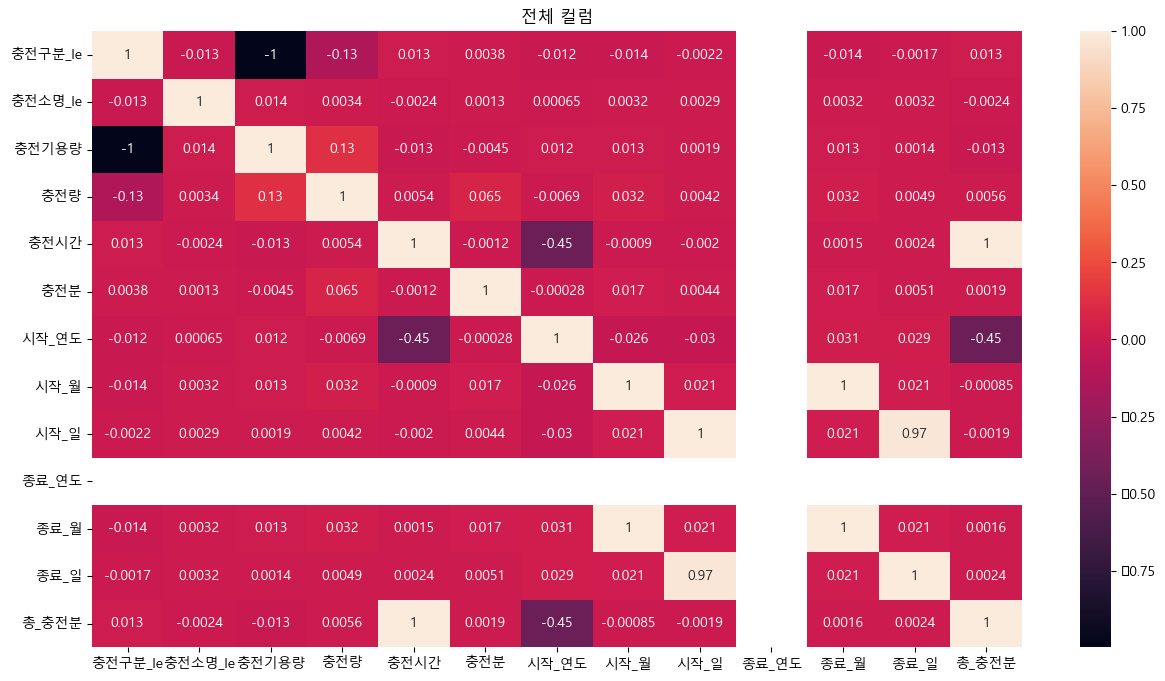

In [57]:
# 히트맵으로 확인
plt.figure(figsize=(15, 8))
sns.heatmap(data = df_total.corr(), annot=True)
plt.title('전체 컬럼')
plt.xticks(rotation=0)
plt.show()

C:\Users\Jik\.conda\envs\study\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\Jik\.conda\envs\study\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


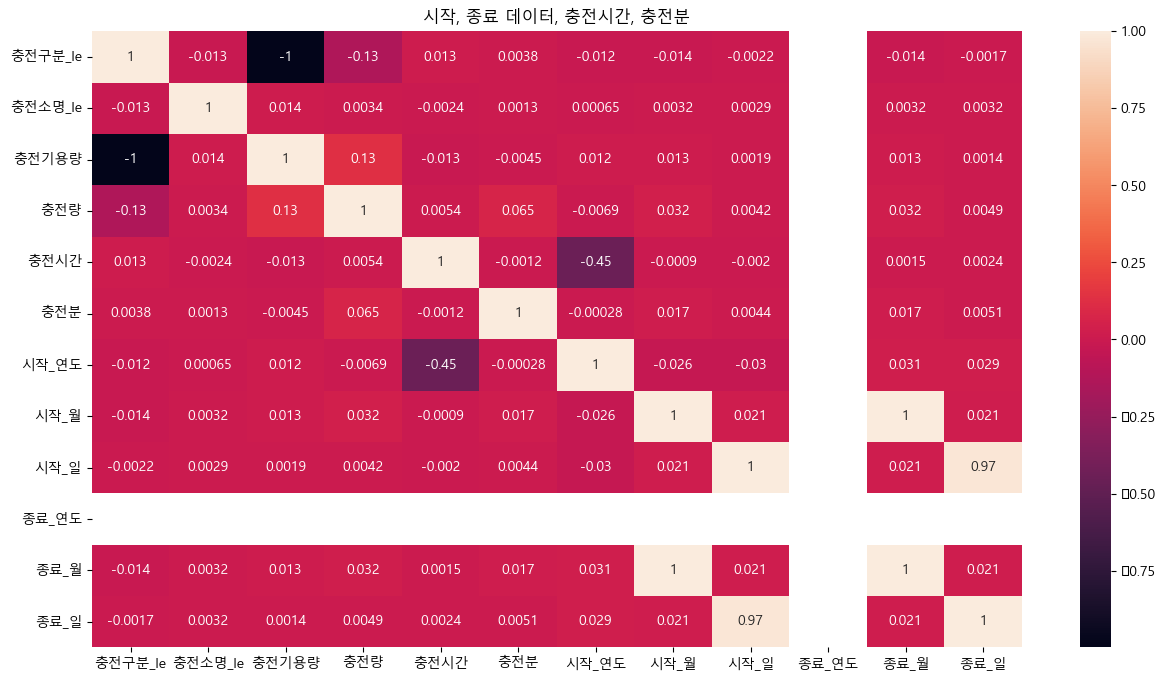

In [58]:
# 히트맵으로 확인
plt.figure(figsize=(15, 8))
sns.heatmap(data = df_one.corr(), annot=True)
plt.title('시작, 종료 데이터, 충전시간, 충전분')
plt.xticks(rotation=0)
plt.show()

C:\Users\Jik\.conda\envs\study\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\Jik\.conda\envs\study\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


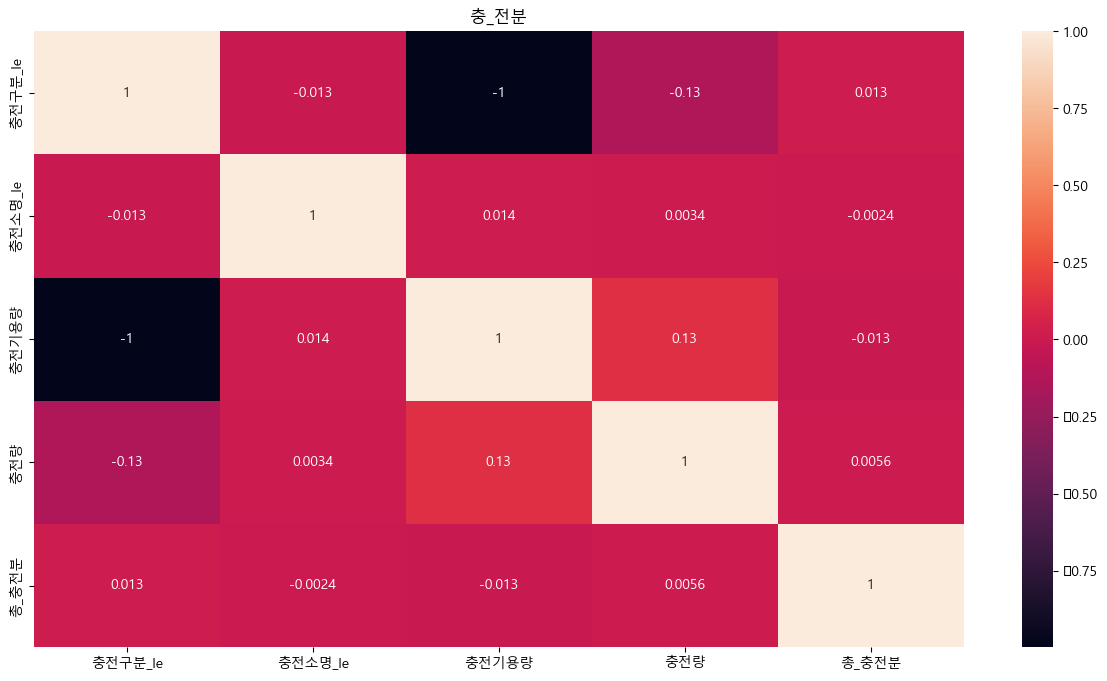

In [59]:
# 히트맵으로 확인
plt.figure(figsize=(15, 8))
sns.heatmap(data = df_two.corr(), annot=True)
plt.title('충_전분')
plt.xticks(rotation=0)
plt.show()

위 구조를 확인해본 결과 충전량에 대한 각 컬럼의 상관관계율이 낮은것으로 파악이 된다.<br>
그래서 충전량을 x축을 두고 각 컬럼의 scatter를 이용해서 데이터의 패턴을 파악을 해본다.

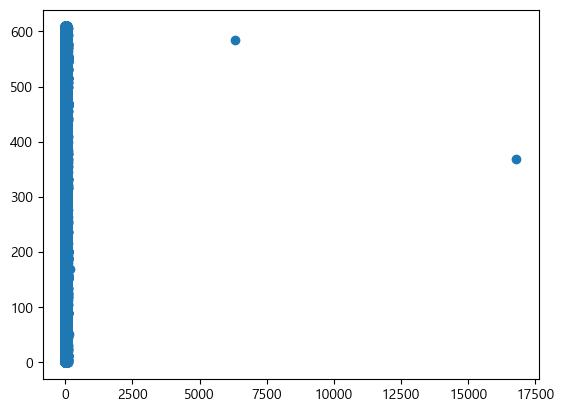

In [68]:
plt.scatter(data=df_total, x='충전량', y='충전소명_le')
plt.show()